##preprocessing 

In [95]:
import pandas as pd
df=pd.read_csv('/content/tfidf_seperate_rouge.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,rouge_score_tfidf,rouge1,rouge2,rougeL,rouge1_precision,rouge1_recall,rouge1_f,rouge2_precision,rouge2_recall,rouge2_f,rougeL_precision,rougeL_recall,rougeL_f
0,0,0,24663,{'rouge1': Score(precision=0.03636363636363636...,"[0.03636363636363636, 0.18181818181818182, 0.0...","['0.0', '0.0', '0.0']","['0.03636363636363636', '0.18181818181818182',...",[0.03636363636363636,0.181818,0.0606060606060606],['0.0','0.0','0.0'],['0.03636363636363636','0.18181818181818182','0.0606060606060606']
1,1,1,141443,{'rouge1': Score(precision=0.04854368932038835...,"[0.04854368932038835, 0.2631578947368421, 0.08...","['0.029411764705882353', '0.16666666666666666'...","['0.038834951456310676', '0.21052631578947367'...",[0.04854368932038835,0.263158,0.0819672131147541],['0.029411764705882353','0.16666666666666666','0.05'],['0.038834951456310676','0.21052631578947367','0.06557377049180328']
2,2,2,79056,"{'rouge1': Score(precision=0.3208955223880597,...","[0.3208955223880597, 0.4174757281553398, 0.362...","['0.07518796992481203', '0.09803921568627451',...","['0.1417910447761194', '0.18446601941747573', ...",[0.3208955223880597,0.417476,0.36286919831223624],['0.07518796992481203','0.09803921568627451','0.0851063829787234'],['0.1417910447761194','0.18446601941747573','0.16033755274261605']
3,3,3,190852,"{'rouge1': Score(precision=0.225, recall=0.562...","[0.225, 0.5625, 0.3214285714285714]","['0.03361344537815126', '0.0851063829787234', ...","['0.14166666666666666', '0.3541666666666667', ...",[0.225,0.562500,0.3214285714285714],['0.03361344537815126','0.0851063829787234','0.048192771084337345'],['0.14166666666666666','0.3541666666666667','0.20238095238095238']
4,4,4,27412,"{'rouge1': Score(precision=0.25, recall=0.5454...","[0.25, 0.5454545454545454, 0.34285714285714286]","['0.07042253521126761', '0.15625', '0.09708737...","['0.1527777777777778', '0.3333333333333333', '...",[0.25,0.545455,0.34285714285714286],['0.07042253521126761','0.15625','0.0970873786407767'],['0.1527777777777778','0.3333333333333333','0.20952380952380956']


In [96]:
methods=['precision','recall','f']
for met in methods:
  for i in ['1','2','L']:
    if i=='1' and met=='recall':
      break
    else:
      df[f'rouge{i}_{met}_float']=df[f'rouge{i}_{met}'].apply(lambda x: float(x.replace('[','').replace("'",'').replace(']','')))


In [97]:
methods=['precision','recall','f']
for met in methods:
  for i in ['1','2','L']:
    print(type(df[f'rouge{i}_{met}'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [98]:
cols=[]
for i in ['1','2','L']:
  for met in ['precision','recall','f']:
    if i=='1' and met=='recall':
      continue
    cols.append(f'rouge{i}_{met}')
    

In [99]:
cols

['rouge1_precision',
 'rouge1_f',
 'rouge2_precision',
 'rouge2_recall',
 'rouge2_f',
 'rougeL_precision',
 'rougeL_recall',
 'rougeL_f']

In [100]:
def converttofloat(text):
  return float(text.replace('[','').replace("'",'').replace(']',''))

In [101]:
for col in cols:
  df[f'{col}_float']=df[col].apply(converttofloat)

In [102]:
for col in cols:
  print(type(df[f'{col}_float'][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [103]:
data={}
data['tfidf']=[(df['rouge1_precision_float'].mean(),df['rouge1_recall'].mean(),df['rouge1_f_float'].mean()),(df['rouge2_precision_float'].mean(),df['rouge2_recall_float'].mean(),df['rouge2_f_float'].mean()),(df['rougeL_precision_float'].mean(),df['rougeL_recall_float'].mean(),df['rougeL_f_float'].mean())]

In [104]:
df=pd.read_csv('/content/embd_seperate_rouge.csv')

In [105]:
methods=['precision','recall','f']
for met in methods:
  for i in ['1','2','L']:
    print(type(df[f'rouge{i}_{met}'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [106]:
for col in cols:
  df[f'{col}_float']=df[col].apply(converttofloat)

In [107]:
data['embd']=[]
data['embd']=[(df['rouge1_precision_float'].mean(),df['rouge1_recall'].mean(),df['rouge1_f_float'].mean()),(df['rouge2_precision_float'].mean(),df['rouge2_recall_float'].mean(),df['rouge2_f_float'].mean()),(df['rougeL_precision_float'].mean(),df['rougeL_recall_float'].mean(),df['rougeL_f_float'].mean())]


In [108]:
df=pd.read_csv('/content/t5_seperate_rouge.csv')


In [109]:
methods=['precision','recall','f']
for met in methods:
  for i in ['1','2','L']:
    print(type(df[f'rouge{i}_{met}'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [110]:
for col in cols:
  df[f'{col}_float']=df[col].apply(converttofloat)

In [111]:
data['t5']=[]
data['t5']=[(df['rouge1_precision_float'].mean(),df['rouge1_recall'].mean(),df['rouge1_f_float'].mean()),(df['rouge2_precision_float'].mean(),df['rouge2_recall_float'].mean(),df['rouge2_f_float'].mean()),(df['rougeL_precision_float'].mean(),df['rougeL_recall_float'].mean(),df['rougeL_f_float'].mean())]


In [112]:
df=pd.read_csv('/content/hybrid_seperate_rouge.csv')


In [113]:
methods=['precision','recall','f']
for met in methods:
  for i in ['1','2','L']:
    print(type(df[f'rouge{i}_{met}'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [114]:
for col in cols:
  df[f'{col}_float']=df[col].apply(converttofloat)

In [115]:
data['hybrid']=[]
data['hybrid']=[(df['rouge1_precision_float'].mean(),df['rouge1_recall'].mean(),df['rouge1_f_float'].mean()),(df['rouge2_precision_float'].mean(),df['rouge2_recall_float'].mean(),df['rouge2_f_float'].mean()),(df['rougeL_precision_float'].mean(),df['rougeL_recall_float'].mean(),df['rougeL_f_float'].mean())]


#taking the dictionary and make plots

In [116]:
import matplotlib.pyplot as plt
#at this point, we have a dicionary where keys are methods (it can be tfidf/embd etc or even methods differ by thier 'k' paramater in extractive for hybrid)
#for each key, the value is a list contains of 3 tuples. the tuples represent rouge1,rouge2 and rougeL.
#each tuple consist: (precision,recall,f)
#all you need now is to take the values according to the desired metric, for example: the code below takes [0][0] and hence it calculate rouge1 precision

###rouge1

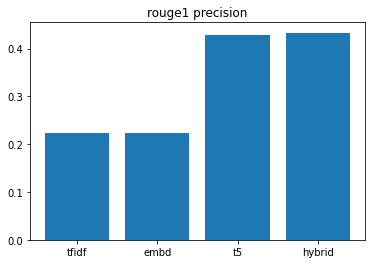

In [117]:
#rouge1- precision

methods=['tfidf','embd','t5','hybrid']
values=[]
for met in methods:
  values.append(data[met][0][0])
values

plt.bar(methods,values)
plt.title('rouge1 precision')
plt.show()

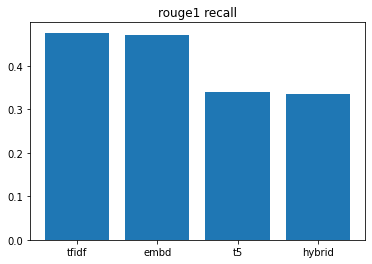

In [120]:
#rouge1- recall

methods=['tfidf','embd','t5','hybrid']
values=[]
for met in methods:
  values.append(data[met][0][1])
values

plt.bar(methods,values)
plt.title('rouge1 recall')
plt.show()

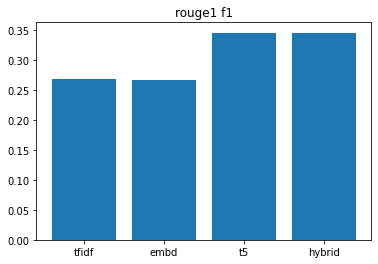

In [121]:
#rouge1- f1

methods=['tfidf','embd','t5','hybrid']
values=[]
for met in methods:
  values.append(data[met][0][2])
values

plt.bar(methods,values)
plt.title('rouge1 f1')
plt.show()

###rouge2

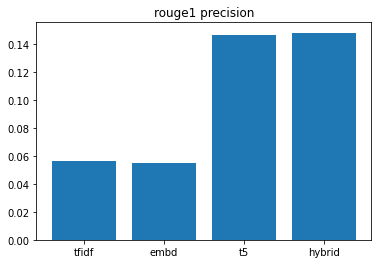

In [118]:
#rouge2- precision

methods=['tfidf','embd','t5','hybrid']
values=[]
for met in methods:
  values.append(data[met][1][0])
values

plt.bar(methods,values)
plt.title('rouge2 precision')
plt.show()

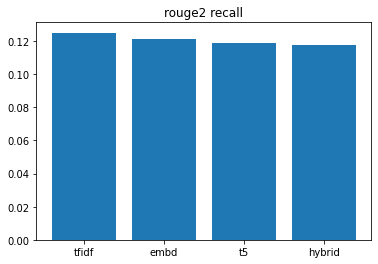

In [122]:
#rouge2- recall

methods=['tfidf','embd','t5','hybrid']
values=[]
for met in methods:
  values.append(data[met][1][1])
values

plt.bar(methods,values)
plt.title('rouge2 recall')
plt.show()

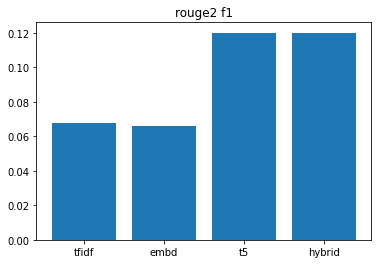

In [123]:
#rouge2- f1

methods=['tfidf','embd','t5','hybrid']
values=[]
for met in methods:
  values.append(data[met][1][2])
values

plt.bar(methods,values)
plt.title('rouge2 f1')
plt.show()

###rougeL

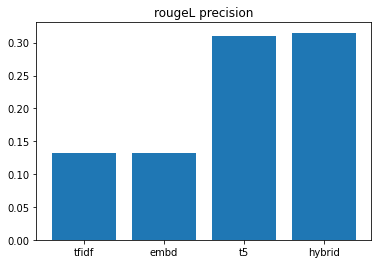

In [119]:
#rougeL- precision

methods=['tfidf','embd','t5','hybrid']
values=[]
for met in methods:
  values.append(data[met][2][0])
values

plt.bar(methods,values)
plt.title('rougeL precision')
plt.show()

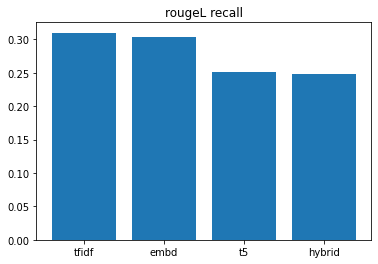

In [124]:
#rougeL- recall

methods=['tfidf','embd','t5','hybrid']
values=[]
for met in methods:
  values.append(data[met][2][1])
values

plt.bar(methods,values)
plt.title('rougeL recall')
plt.show()

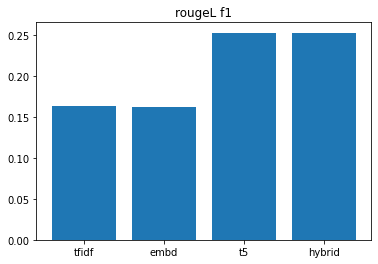

In [125]:
#rougeL- f1

methods=['tfidf','embd','t5','hybrid']
values=[]
for met in methods:
  values.append(data[met][2][2])
values

plt.bar(methods,values)
plt.title('rougeL f1')
plt.show()

In [129]:
methods

['tfidf', 'embd', 't5', 'hybrid']

In [141]:
def change_method(method):
  if method == 'tfidf':
    return 'EX-tfidf'
  if method == 'embd':
    return 'EX-embbeded'
  if method == 't5':
    return 'AB-T5'
  if method == 'hybrid':
    return 'Hybrid-TIM'

In [154]:
print("{:<13} {:<10} {:<10} {:<10} {:<10}".format('Method','ROUGE','Precision', 'Recall', 'F1'))
for met in methods:
  k=1
  while k<4:
    precision = data[met][k-1][0]
    recall = data[met][k-1][1]
    f1 = data[met][k-1][2]
    temp = k
    if k==3:
      temp= 'L'
    k +=1
    method = change_method(met)
    print("{:<13} {:<10} {:<10} {:<10} {:<10}".format(method, 'ROUGE' + str(temp), '{:.4f}'.format(precision), '{:.4f}'.format(recall),'{:.4f}'.format(f1)))

Method        ROUGE      Precision  Recall     F1        
EX-tfidf      ROUGE1     0.2235     0.4759     0.2678    
EX-tfidf      ROUGE2     0.0561     0.1251     0.0678    
EX-tfidf      ROUGEL     0.1325     0.3101     0.1634    
EX-embbeded   ROUGE1     0.2237     0.4696     0.2670    
EX-embbeded   ROUGE2     0.0549     0.1215     0.0661    
EX-embbeded   ROUGEL     0.1319     0.3043     0.1620    
AB-T5         ROUGE1     0.4278     0.3400     0.3457    
AB-T5         ROUGE2     0.1468     0.1187     0.1200    
AB-T5         ROUGEL     0.3099     0.2508     0.2528    
Hybrid- TIM   ROUGE1     0.4333     0.3358     0.3445    
Hybrid- TIM   ROUGE2     0.1483     0.1174     0.1197    
Hybrid- TIM   ROUGEL     0.3151     0.2490     0.2531    


#same proccess now for the plot of hybrid different K's

In [75]:
import pandas as pd
df=pd.read_csv('/content/hybrid_30_seperate_rouge.csv')


In [76]:
methods=['precision','recall','f']
for met in methods:
  for i in ['1','2','L']:
    print(type(df[f'rouge{i}_{met}'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [77]:
cols=[]
for i in ['1','2','L']:
  for met in ['precision','recall','f']:
    if i=='1' and met=='recall':
      continue
    cols.append(f'rouge{i}_{met}')

In [78]:
def converttofloat(text):
  return float(text.replace('[','').replace("'",'').replace(']',''))

In [79]:
for col in cols:
  df[f'{col}_float']=df[col].apply(converttofloat)

In [80]:
data={}

In [81]:
data['hybrid_30']=[]
data['hybrid_30']=[(df['rouge1_precision_float'].mean(),df['rouge1_recall'].mean(),df['rouge1_f_float'].mean()),(df['rouge2_precision_float'].mean(),df['rouge2_recall_float'].mean(),df['rouge2_f_float'].mean()),(df['rougeL_precision_float'].mean(),df['rougeL_recall_float'].mean(),df['rougeL_f_float'].mean())]

In [82]:
import pandas as pd
df=pd.read_csv('/content/hybrid_50_seperate_rouge.csv')

In [83]:
for col in cols:
  df[f'{col}_float']=df[col].apply(converttofloat)

In [84]:
data['hybrid_50']=[]
data['hybrid_50']=[(df['rouge1_precision_float'].mean(),df['rouge1_recall'].mean(),df['rouge1_f_float'].mean()),(df['rouge2_precision_float'].mean(),df['rouge2_recall_float'].mean(),df['rouge2_f_float'].mean()),(df['rougeL_precision_float'].mean(),df['rougeL_recall_float'].mean(),df['rougeL_f_float'].mean())]

In [85]:
import pandas as pd
df=pd.read_csv('/content/hybrid_70_seperate_rouge.csv')

In [86]:
for col in cols:
  df[f'{col}_float']=df[col].apply(converttofloat)

In [87]:
data['hybrid_70']=[]
data['hybrid_70']=[(df['rouge1_precision_float'].mean(),df['rouge1_recall'].mean(),df['rouge1_f_float'].mean()),(df['rouge2_precision_float'].mean(),df['rouge2_recall_float'].mean(),df['rouge2_f_float'].mean()),(df['rougeL_precision_float'].mean(),df['rougeL_recall_float'].mean(),df['rougeL_f_float'].mean())]

In [88]:
import pandas as pd
df=pd.read_csv('/content/hybrid_70_seperate_rouge.csv')

In [89]:
for col in cols:
  df[f'{col}_float']=df[col].apply(converttofloat)

In [90]:
data['hybrid_90']=[]
data['hybrid_90']=[(df['rouge1_precision_float'].mean(),df['rouge1_recall'].mean(),df['rouge1_f_float'].mean()),(df['rouge2_precision_float'].mean(),df['rouge2_recall_float'].mean(),df['rouge2_f_float'].mean()),(df['rougeL_precision_float'].mean(),df['rougeL_recall_float'].mean(),df['rougeL_f_float'].mean())]

In [91]:
import matplotlib.pyplot as plt


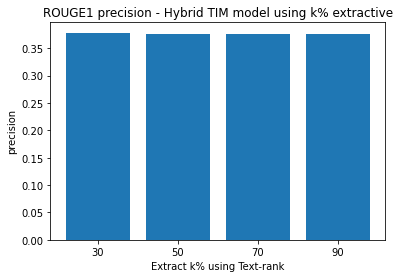

In [92]:
methods=['30','50','70','90']
values=[]
for met in methods:
  values.append(data[f'hybrid_{met}'][0][0])
values

plt.bar(methods,values)
plt.title('ROUGE1 precision - Hybrid TIM model using k% extractive')
plt.xlabel("Extract k% using Text-rank")
plt.ylabel("Precision")
plt.show()